In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define some consts

img_size = 28*28   # minist image dimension
model_file_name = 'model/sample_weight.pkl'

In [3]:
key_file = {
    'test_img':     'mnist/t10k-images-idx3-ubyte.gz',
    'test_label':   'mnist/t10k-labels-idx1-ubyte.gz'
}

In [4]:
def load_images(file_name):
    with gzip.open(file_name, 'rb') as f:
        images = np.frombuffer(f.read(), np.uint8, offset=16)
    images = images.reshape(-1, img_size)

    print('Done with loading images:', file_name)

    return images

In [5]:
def load_labels(file_name):
    with gzip.open(file_name, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)

    print('Done with loading labels: ', file_name)
    return labels

In [6]:
!pwd

/home/orabbah/Downloads


In [7]:
key_file['test_img']

'mnist/t10k-images-idx3-ubyte.gz'

In [8]:
x_test = load_images(key_file['test_img'])

FileNotFoundError: [Errno 2] No such file or directory: 'mnist/t10k-images-idx3-ubyte.gz'

In [ ]:
x_test.shape

(10000, 784)

In [ ]:
test_img = x_test[5000].reshape(28, 28)

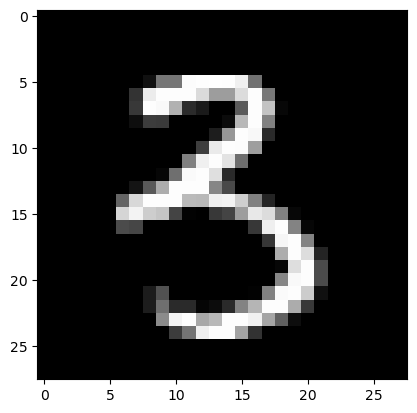

In [ ]:
plt.imshow(test_img, cmap='gray')

In [ ]:
test_img.shape

(28, 28)

In [ ]:
y_test = load_labels(key_file['test_label'])

Done with loading labels:  mnist/t10k-labels-idx1-ubyte.gz


In [ ]:
y_test.shape

(10000,)

In [ ]:
y_test[5000]

3

## Networks

In [ ]:
import pickle

In [ ]:
def sigmoid(a):
    return 1/(1 + np.exp(-a))

In [ ]:
def softmax(a):
    c = np.max(a)
    a = np.exp(a - c)
    s = np.sum(a)
    
    return a/s 
    

In [ ]:
def init_network(model_file_name):
    with open(model_file_name, 'rb') as f:
        network = pickle.load(f)

    return network

In [ ]:
network = init_network(model_file_name)

In [ ]:
w1 = network['W1']

In [ ]:
def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)

    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)

    a3 = np.dot(z2, w3) + b3

    y =  softmax(a3)

    return y

In [ ]:
input_5000 = x_test[5000]/255.0

In [ ]:
y = predict(network, input_5000)

In [ ]:
print(y)
print(np.sum(y))

[2.28038138e-03 1.18191520e-04 7.62911472e-04 8.14812337e-01
 2.16972786e-04 1.77109839e-01 6.08290171e-05 2.41145964e-04
 3.66962773e-03 7.27763654e-04]
1.0


In [ ]:
y_hat = np.argmax(y)
y_certainty = np.max(y)

In [ ]:
if y_hat == y_test[5000]:
    print('success')
else:
    print('fail')
    
print(f'x[5000] is predicted as {y_hat} with {y_certainty*100}%. The label is {y_test[5000]}')

success
x[5000] is predicted as 3 with 81.48123374079384%. The label is 3
